
# CPA petit projet 2023
## Problème du cercle minimum / Smallest enclosing disk : Welzl algorithm
### ETUDIANTS STL :
 - Elhadj Alseiny DIALLO - 21314820
 - Tracy HONG - 21314944


In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from IPython.display import display

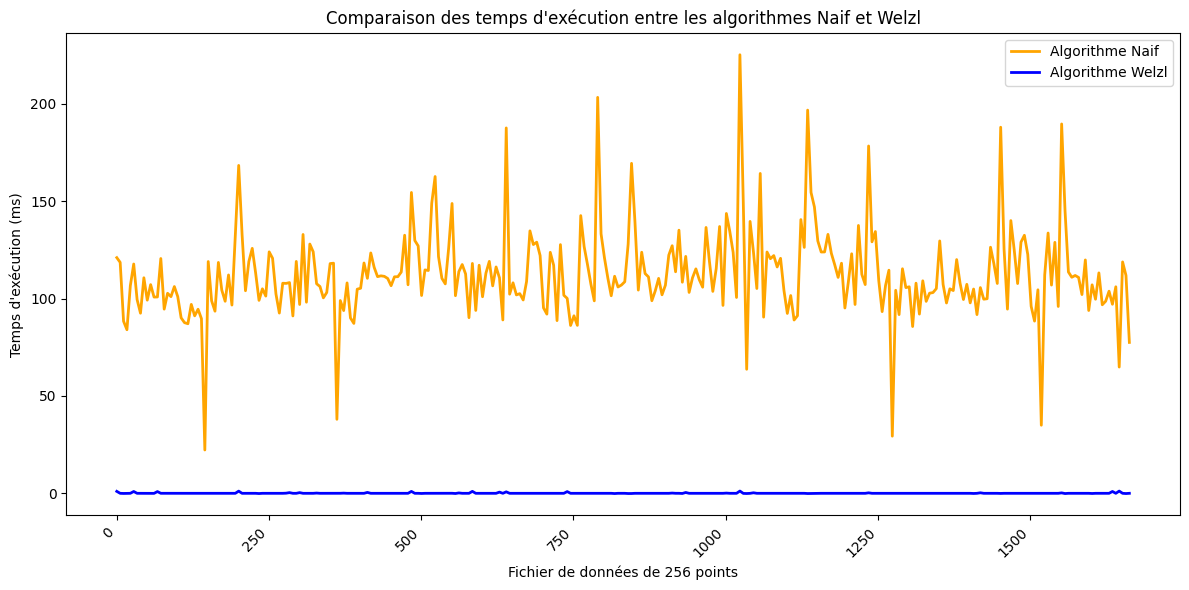

In [2]:

def plot_execution_times(data_file, output_file):
    # Initialisation des listes pour stocker les données
    filenames = []
    execution_times_naif = []
    execution_times_welzl = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            filenames.append(parts[0])
            execution_times_naif.append(int(float(parts[1])))
            execution_times_welzl.append(int(float(parts[2])))

    # Création du graphe
    plt.figure(figsize=(12, 6))
    # Lissage des courbes
    x = np.linspace(0, len(filenames), 300)  # Crée une série de points pour lisser les courbes
    spline_naif = make_interp_spline(range(len(filenames)), execution_times_naif, k=2)  # Interpolation spline
    spline_welzl = make_interp_spline(range(len(filenames)), execution_times_welzl, k=2)  # Interpolation spline
    y_smooth_naif = spline_naif(x)
    y_smooth_welzl = spline_welzl(x)
    
    # Tracé des courbes lissées
    plt.plot(x, y_smooth_naif, label='Algorithme Naif', linewidth=2, color='orange')
    plt.plot(x, y_smooth_welzl, label='Algorithme Welzl', linewidth=2, color='blue')
    
    # plt.plot(filenames, execution_times_naif, label='Algorithme Naif', color='red')
    # plt.plot(filenames, execution_times_welzl, label='Algorithme Welzl', color='blue')
    plt.xlabel('Fichier de données de 256 points')
    plt.ylabel('Temps d\'exécution (ms)')
    plt.title('Comparaison des temps d\'exécution entre les algorithmes Naif et Welzl')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    plt.tight_layout()

    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphe
    plt.show()

# Exemple d'utilisation de la fonction avec un fichier de données
plot_execution_times('./results/dataFile_256points.txt', './graphs/graph_Naif_Welzl_256points.png')


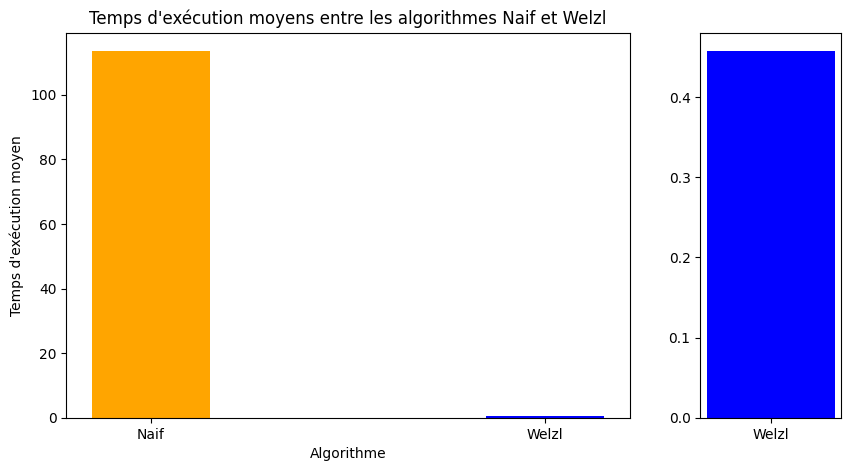

In [3]:
list_data_structures = ['Algorithme Naif', 'Algorithme Welzl']
def plot_execution_times_mean_histo(data_file,output_file):
    # Initialisation des listes pour stocker les données
    filenames = []
    execution_times_naif = []
    execution_times_welzl = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            filenames.append(parts[0])
            execution_times_naif.append(float(parts[1]))
            execution_times_welzl.append(float(parts[2]))

    # Création de l'histogramme
    
    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot

    # Create a list of the average times
    avg_times = [np.mean(execution_times_naif), np.mean(execution_times_welzl)]
    avg_sub_times = [np.mean(execution_times_welzl)]
    
    # Create a list of the names of the data structures
    data_structures = ['Naif', 'Welzl']
    data_sub_structures = ['Welzl']
    
    plt.clf()
    gride = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
    ax0 = plt.subplot(gride[0])
    ax1 = plt.subplot(gride[1])
    
    plt.subplot(1,2,1)
    plt.xlabel('Algorithme')
    plt.ylabel('Temps d\'exécution moyen')
    plt.title('Temps d\'exécution moyens entre les algorithmes Naif et Welzl')
    ax0.bar(data_structures, avg_times, width=0.3, color=['orange', 'blue'])
    
    plt.subplot(1,2,2)
    ax1.bar(data_sub_structures, avg_sub_times, width=0.3, color='blue') 
    
    # Sauvegarde de l'image
    plt.savefig(output_file)
    plt.show()

# Appel de la fonction avec le chemin du fichier de données
plot_execution_times_mean_histo('./results/dataFile_256points.txt', './graphs/graph_Naif_Welzl_256points_histo_mean.png')



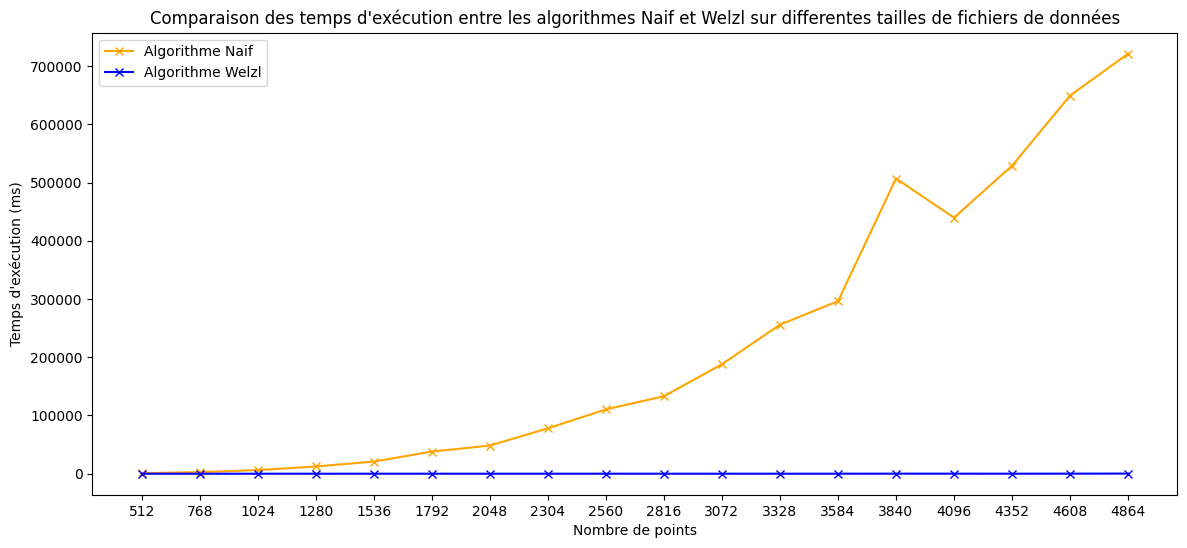

In [4]:
def plot_execution_times_combiningFiles(data_file, output_file):
     # Initialisation des listes pour stocker les données
    point_counts = [512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864]
    execution_times_naif = []
    execution_times_welzl = []
    
    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            # filenames.append(parts[0])
            execution_times_naif.append(int(float(parts[0])))
            execution_times_welzl.append(int(float(parts[1])))
    # Création du graphe
    plt.figure(figsize=(14, 6))
    
    plt.plot(point_counts, execution_times_naif, label='Algorithme Naif',marker='x', color='orange')
    plt.plot(point_counts, execution_times_welzl, label='Algorithme Welzl',marker='x', color='blue')
    plt.xlabel('Nombre de points')
    plt.ylabel('Temps d\'exécution (ms)')
    plt.title('Comparaison des temps d\'exécution entre les algorithmes Naif et Welzl sur differentes tailles de fichiers de données')
    plt.legend()
    # plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    # plt.tight_layout()

    # Définir les valeurs de l'axe x
    plt.xticks(point_counts)
    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphe
    plt.show()

# Appel de la fonction avec le chemin du fichier et le nom du fichier de sortie
plot_execution_times_combiningFiles('./results/dataFile_combiningPoints.txt', './graphs/graph_Naif_Welzl_combiningPoints.png')

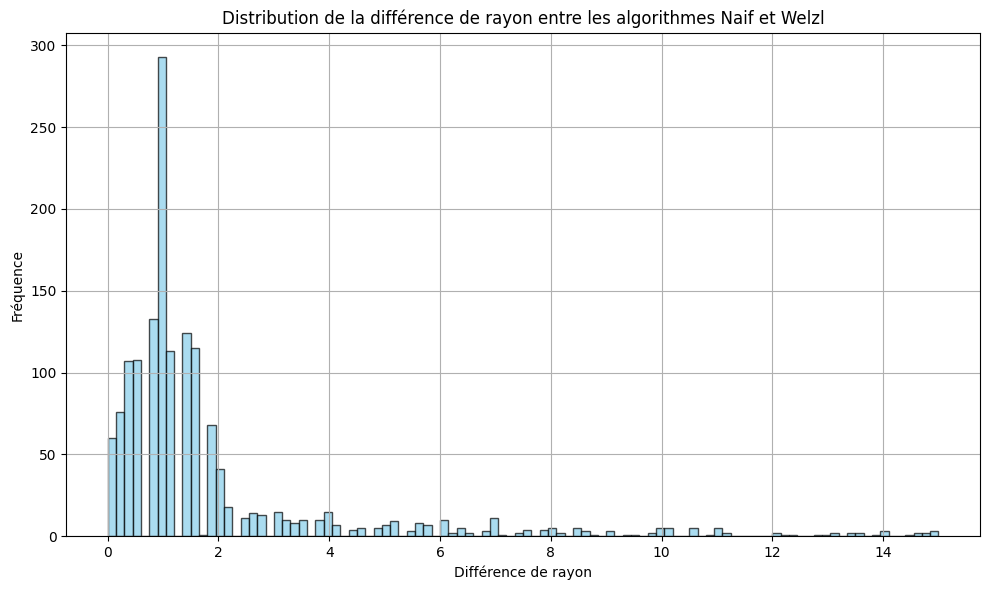

In [7]:


def plot_radius_difference(data_file, output_file):
    # Initialisation des listes pour stocker les différences de rayon
    radius_differences = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            radius_naif = float(parts[1])  # Rayon calculé par l'algorithme naif
            radius_welzl = float(parts[2])  # Rayon calculé par l'algorithme de Welzl
            # Calcul de la différence de rayon entre les deux algorithmes
            radius_difference = abs(radius_naif - radius_welzl)
            radius_differences.append(radius_difference)

    # Création du graphique de fréquence
    plt.figure(figsize=(10, 6))
    plt.hist(radius_differences, bins=100, range=(0, 15), color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Différence de rayon')
    plt.ylabel('Fréquence')
    plt.title('Distribution de la différence de rayon entre les algorithmes Naif et Welzl')
    plt.grid(True)
    plt.tight_layout()

    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphique
    plt.show()

# Appel de la fonction avec le chemin du fichier de données et le nom du fichier de sortie
plot_radius_difference('./results/dataFile_256points_results.txt', './graphs/radius_difference_histogram_1.png')


test-1014.points
test-1017.points
test-1018.points
test-1025.points
test-1026.points
test-103.points
test-1036.points
test-1039.points
test-1048.points
test-1051.points
test-1065.points
test-1068.points
test-1077.points
test-1084.points
test-1123.points
test-1133.points
test-1136.points
test-1139.points
test-1147.points
test-1170.points
test-1185.points
test-1213.points
test-1222.points
test-1247.points
test-1255.points
test-127.points
test-1276.points
test-1279.points
test-1282.points
test-1289.points
test-1293.points
test-1303.points
test-1308.points
test-1338.points
test-1341.points
test-1356.points
test-1372.points
test-1391.points
test-1395.points
test-140.points
test-1405.points
test-1418.points
test-1435.points
test-1451.points
test-1460.points
test-1461.points
test-1462.points
test-1475.points
test-1479.points
test-1489.points
test-1491.points
test-1495.points
test-1504.points
test-151.points
test-1510.points
test-1517.points
test-1518.points
test-152.points
test-1522.points
te

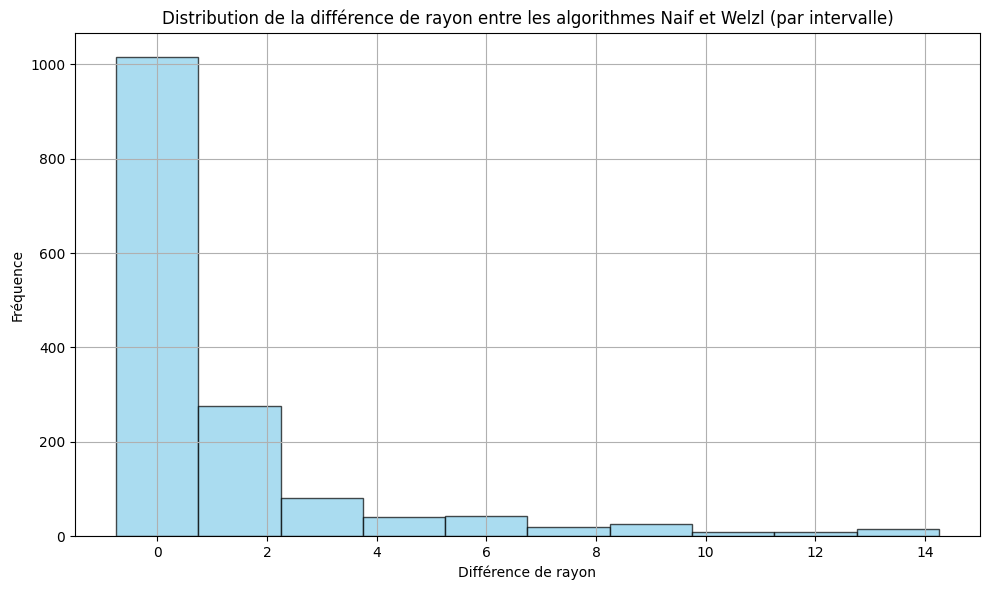

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radius_difference(data_file, output_file):
    # Initialisation des listes pour stocker les différences de rayon
    radius_differences = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            radius_naif = float(parts[1])  # Rayon calculé par l'algorithme naif
            radius_welzl = float(parts[2])  # Rayon calculé par l'algorithme de Welzl
            # Calcul de la différence de rayon entre les deux algorithmes
            radius_difference = abs(radius_naif - radius_welzl)
            if radius_difference > 10 : print(parts[0])
            radius_differences.append(radius_difference)

    # Détermination des intervalles et des fréquences
    interval_min = 0
    interval_max = 15
    num_bins = 10  # Nombre d'intervalles souhaité
    bin_edges = np.linspace(interval_min, interval_max, num_bins + 1)
    frequencies, _ = np.histogram(radius_differences, bins=bin_edges)

    # Création du graphique de fréquence avec regroupement par intervalle
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], frequencies, width=np.diff(bin_edges), color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Différence de rayon')
    plt.ylabel('Fréquence')
    plt.title('Distribution de la différence de rayon entre les algorithmes Naif et Welzl (par intervalle)')
    plt.grid(True)
    plt.tight_layout()

    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphique
    plt.show()

# Appel de la fonction avec le chemin du fichier de données et le nom du fichier de sortie
plot_radius_difference('./results/dataFile_256points_results_1.txt', './graphs/radius_difference_histogram_grouped_1.png')


In [8]:
def calculate_mean_radius_difference(data_file):
    # Initialisation des listes pour stocker les différences de rayon
    radius_differences = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            radius_naif = float(parts[1])  # Rayon calculé par l'algorithme naif
            radius_welzl = float(parts[2])  # Rayon calculé par l'algorithme de Welzl
            # Calcul de la différence de rayon entre les deux algorithmes
            radius_difference = abs(radius_naif - radius_welzl)
            radius_differences.append(radius_difference)

    # Création du DataFrame à partir des différences de rayon
    df = pd.DataFrame({'Radius Difference': radius_differences})

    # Regroupement des données par intervalles de 0 à 15
    bins = pd.cut(df['Radius Difference'], bins=range(16))
    grouped_df = df.groupby(bins).size().reset_index(name='Frequency')

    # Affichage du DataFrame regroupé
    display(grouped_df)
    
    # Calculate the mean of the radius differences
    mean_radius_difference = np.mean(radius_differences)

    return mean_radius_difference

# Appel de la fonction avec le chemin du fichier de données
mean_difference = calculate_mean_radius_difference('./results/dataFile_256points_results.txt')

print('Mean Difference of Radius:', mean_difference)

/var/folders/n4/t9w00r7s4cb20_89t9bl6mc00000gn/T/ipykernel_73091/698408097.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(bins).size().reset_index(name='Frequency')


,Radius Difference,Frequency
0,"(0, 1]",717
1,"(1, 2]",462
2,"(2, 3]",71
3,"(3, 4]",53
4,"(4, 5]",28
5,"(5, 6]",37
6,"(6, 7]",23
7,"(7, 8]",16
8,"(8, 9]",14
9,"(9, 10]",9


Mean Difference of Radius: 5.657937462417318
